In [1]:
from keras.datasets import mnist 
from keras.utils import np_utils  
from keras.models import Sequential  
from keras.layers import Dense, Activation 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


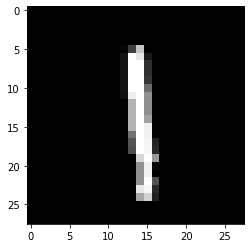

1

In [4]:
import matplotlib.pyplot as plt # 导入可视化的包
im = plt.imshow(X_train[8],cmap='gray')

plt.show()
y_train[8]

In [5]:
X_train = X_train.astype('float32')  #把数据转换成浮点类型（原为字符串类型）
X_test = X_test.astype('float32')

In [6]:
from keras.utils import np_utils  
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
from keras.models import Sequential  
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()

In [8]:
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Conv2D(64, (3, 3)))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [15]:
model.fit(X_train, Y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 14s 23ms/step - loss: 1.5161 - accuracy: 0.9325
Epoch 2/20
600/600 [==============================] - 14s 23ms/step - loss: 0.1336 - accuracy: 0.9768
Epoch 3/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0968 - accuracy: 0.9842
Epoch 4/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0832 - accuracy: 0.9872
Epoch 5/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0719 - accuracy: 0.9904
Epoch 6/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0689 - accuracy: 0.9915
Epoch 7/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0660 - accuracy: 0.9926
Epoch 8/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0561 - accuracy: 0.9938
Epoch 9/20
600/600 [==============================] - 14s 23ms/step - loss: 0.0529 - accuracy: 0.9947
Epoch 10/20
600/600 [==============================] - 14s 23ms/step - loss: 0.059

In [16]:
score = model.evaluate(X_test, Y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.5873 - accuracy: 0.9864
Test loss:  0.587347149848938
Test accuracy:  0.9864000082015991
